# Introduction

Check the performance of a set of experiments the DCC says is ready for release

In [1]:
import pandas
import sys
import os
import base64
from io import BytesIO
from matplotlib import pyplot
from pathlib import Path
from IPython.display import HTML

In [2]:
%matplotlib agg

In [3]:
EC = str(Path("~/proj/encoded_client").expanduser())
if EC not in sys.path:
    sys.path.append(EC)

In [4]:
from encoded_client.encoded import ENCODED, get_object_type

In [5]:
server = ENCODED("www.encodeproject.org")
server.load_netrc()

In [6]:
experiments = """ENCSR219BFN
ENCSR890CWQ
ENCSR207WIB
ENCSR246HPQ
ENCSR999LNM
ENCSR691XPO
ENCSR557TQB
ENCSR561NJH
ENCSR388VOO
ENCSR229IZP
ENCSR673HGX
ENCSR057PZA
ENCSR946CHL
ENCSR095STQ
ENCSR051HKT
ENCSR324EEG
ENCSR895JQC
ENCSR040FYZ
ENCSR908QBY
ENCSR853KDR
ENCSR404JRH
ENCSR261CGJ
ENCSR011NKG
ENCSR522XUH
ENCSR180BEF
ENCSR396RZS
ENCSR015CNO
ENCSR224DDT
ENCSR613PRC
ENCSR246QHK
ENCSR966PYV
ENCSR033DKJ
ENCSR726JZK
ENCSR826LBN
ENCSR105NCS
ENCSR147MNP
ENCSR329YON
ENCSR708BRB
ENCSR026MBF
ENCSR891MZP
ENCSR179IEB
ENCSR240XKH
ENCSR000PYA
ENCSR406VBM
ENCSR715ZEX
ENCSR335RDP
ENCSR928PUY
ENCSR352TIK
ENCSR281RXI
ENCSR706DSF
ENCSR965BKM
ENCSR274IOR
ENCSR111VTZ
ENCSR458WYO
ENCSR719WMN
ENCSR792GKF
ENCSR503EES
ENCSR098AHH
ENCSR856TIQ
ENCSR731YIN
ENCSR376WUA
ENCSR555ZBN
ENCSR795QPS
ENCSR578KNO
ENCSR623UPC
ENCSR042LLE
ENCSR143RJN
ENCSR889MPU
ENCSR959MAY
ENCSR393ONB
ENCSR790REF
ENCSR741HLC
ENCSR932KHL
ENCSR132LRJ
ENCSR701ZXF
ENCSR755IPI
ENCSR181CVM
ENCSR247MBB
ENCSR140RTO
ENCSR309VHO
ENCSR791XHA
ENCSR720ZTB
ENCSR256YDM
ENCSR971VVX
ENCSR192DXS
ENCSR667IFH
ENCSR471WLR
ENCSR616HPK
ENCSR700PWC
ENCSR367WCE
ENCSR559LZU
ENCSR114LKQ
ENCSR531DPB
ENCSR409NYW
ENCSR716LPB
ENCSR910XQY
ENCSR455MOH
ENCSR162TAV
ENCSR012UAU
ENCSR239ZEK
ENCSR830HVH
ENCSR411CXN
ENCSR605GUU
ENCSR385VVX
ENCSR315IMH
ENCSR652HYA
ENCSR286HKQ
ENCSR430OXW
ENCSR913DZP
ENCSR891TUX
ENCSR696VWS
ENCSR998EKR
ENCSR695VQF
ENCSR507BRI
ENCSR085RNZ
ENCSR665FSO
ENCSR807MST
ENCSR092PTD
ENCSR527NUJ
""".split()
#graph = {"@graph": [{"@id": "/experiments/{}/".format(x)} for x in experiments]}

In [7]:
#search = "https://www.encodeproject.org/search/?type=Experiment&@id=%2Fexperiments%2FENCSR479MNN%2F&@id=%2Fexperiments%2FENCSR288RRZ%2F&@id=%2Fexperiments%2FENCSR899OKE%2F&@id=%2Fexperiments%2FENCSR464VSR%2F&@id=%2Fexperiments%2FENCSR774MGO%2F&@id=%2Fexperiments%2FENCSR129VBC%2F&@id=%2Fexperiments%2FENCSR420YFF%2F&@id=%2Fexperiments%2FENCSR942YMN%2F&@id=%2Fexperiments%2FENCSR648YUM%2F&@id=%2Fexperiments%2FENCSR903XMI%2F&@id=%2Fexperiments%2FENCSR244HHV%2F&@id=%2Fexperiments%2FENCSR168PXI%2F&@id=%2Fexperiments%2FENCSR308XAR%2F&@id=%2Fexperiments%2FENCSR484WZL%2F"
#search = "https://www.encodeproject.org/search/?type=Experiment&lab.title=Barbara+Wold%2C+Caltech&lab.title=Ali+Mortazavi%2C+UCI&lab.title=Rob+Spitale%2C+UCI&status=submitted&audit.WARNING.category!=lacking+processed+data&assay_title=total+RNA-seq"
#search = "https://www.encodeproject.org/search/?type=Experiment&accession=ENCSR723XFW&accession=ENCSR967IKT&accession=ENCSR511LAZ&accession=ENCSR886NLC&accession=ENCSR086MHH&accession=ENCSR129DEA&accession=ENCSR584OSM&accession=ENCSR549HQM&accession=ENCSR093SMP&accession=ENCSR299GYD"
search = "https://www.encodeproject.org/search/?type=Experiment&accession=ENCSR693KOP&accession=ENCSR061RDC&accession=ENCSR366LFQ&accession=ENCSR019ICB&accession=ENCSR036SUN&accession=ENCSR275JSL&accession=ENCSR395DKP&accession=ENCSR562BUN&accession=ENCSR198QAJ&accession=ENCSR795GYH&accession=ENCSR634JQK&accession=ENCSR052LON&accession=ENCSR949UTT&accession=ENCSR394ZSF&accession=ENCSR339NMQ&accession=ENCSR483IHO&accession=ENCSR292TYT&accession=ENCSR596KAH&accession=ENCSR290IHM&accession=ENCSR863VFU&accession=ENCSR648JOK&accession=ENCSR875MVZ&accession=ENCSR061HMO&accession=ENCSR365ARV"
graph = server.get_json(search)

In [8]:
def format_alias(alias):
    return ",".join([x.split(':')[1] for x in alias])

def filter_gene_type_metric(metric):
    to_remove = [
        "@id", 
        "@type", 
        "aliases", 
        "assay_term_name",
        "assay_term_id",
        "attachment", 
        "date_created", 
        "quality_metric_of", 
        "schema_version",
        "status",
        "step_run",
        "submitted_by",
        "lab", 
        "award", 
        "uuid"
    ]
    filtered_metric = metric.copy()
    for remove in to_remove:
        if remove in filtered_metric:
            del filtered_metric[remove]
        else:
            print("Warning {} not found".format(remove))
    return filtered_metric


def plot_gene_type_metric(gene_types):
    stream = BytesIO()
    f = pyplot.figure(figsize=(8,8))
    ax = f.add_subplot(1,1,1)
    gene_types.T.plot.bar(stacked=True, ax=ax)
    f.savefig(stream, format='png')
    return base64.b64encode(stream.getvalue()).decode('ascii')
   
    
def report_experiment(experiment):    
    star_quality = {}
    spearman = {}
    gene_types = {}
    for replicate in experiment.replicates:
        alias = format_alias(replicate["library"]["aliases"])


        for file in replicate["files"]:
            for i, metric in enumerate(file["quality_metrics"]):
                metric_for = ",".join(file._json["quality_metrics"][i]["quality_metric_of"])
                if get_object_type(metric) == "StarQualityMetric":
                    mapped = metric['Number of reads mapped to multiple loci'] + metric['Uniquely mapped reads number']
                    fraction_mapped = mapped / metric['Number of input reads']                    
                    star_quality[(alias, file["output_type"])] = {
                        'multi': metric['Number of reads mapped to multiple loci'],
                        'uniq': metric['Uniquely mapped reads number'],
                        'mapped': mapped,
                        'total': metric['Number of input reads'],
                        '%mapped': "{:.4}".format(fraction_mapped * 100),
                    }
                    #print(alias, metric)
                elif get_object_type(metric) == "MadQualityMetric":
                    spearman[metric_for] = metric
                    spearman[metric_for].setdefault('alias', set()).add(alias)
                elif get_object_type(metric) == "GeneTypeQuantificationQualityMetric":
                    gene_types[alias] = filter_gene_type_metric(metric)

    #print(pandas.DataFrame(star_quality).T)
    #plot_gene_type_metric(pandas.DataFrame(gene_types))
    block = [
        '<h1><a href="https://www.encodeproject.org{}">{}</a> {}</h1>'.format(experiment['@id'], experiment['accession'], experiment['description'])
    ]
    if len(star_quality) > 0:
        star_quality = pandas.DataFrame(star_quality).T
        block.append(star_quality.to_html())
    if len(spearman) > 0:
        for metric_for, s in spearman.items():
            block.append("<p>Spearman: {} {}</p>".format(','.join(s['alias']), s["Spearman correlation"]))
    if len(gene_types) > 0:
        gene_types = pandas.DataFrame(gene_types)
        block.append('<p><img src="data:image/png;base64,{}"/></p>'.format(plot_gene_type_metric(gene_types)))
    return block


/tmp/ipykernel_1425164/281410947.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = pyplot.figure(figsize=(8,8))



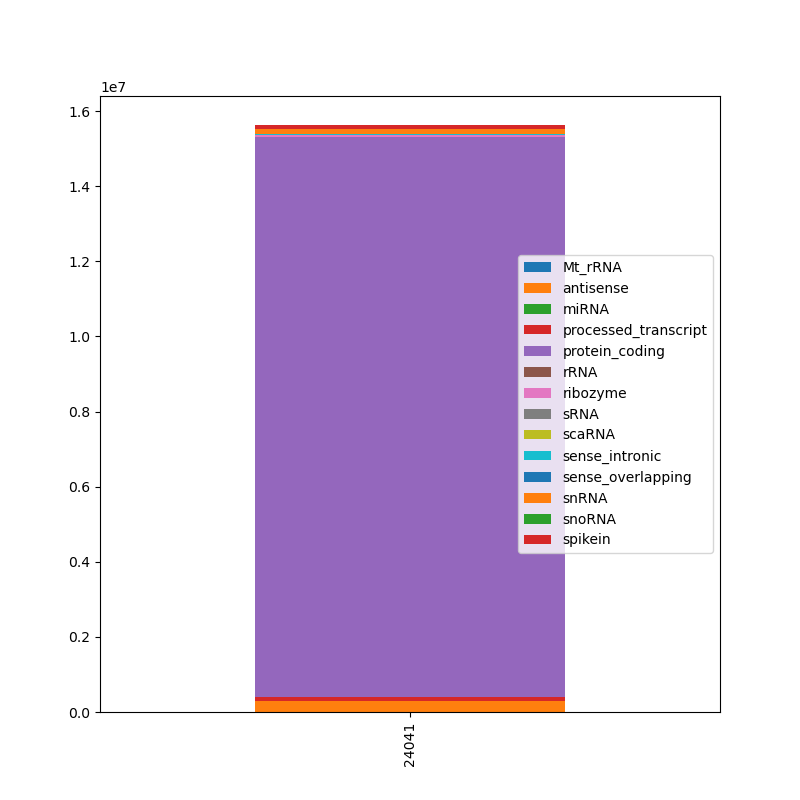
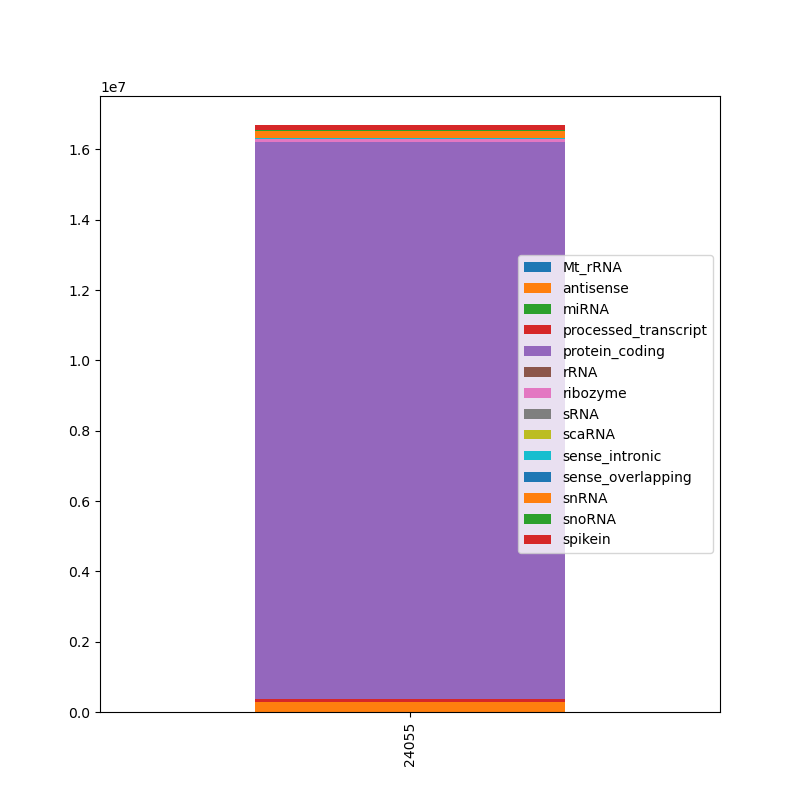
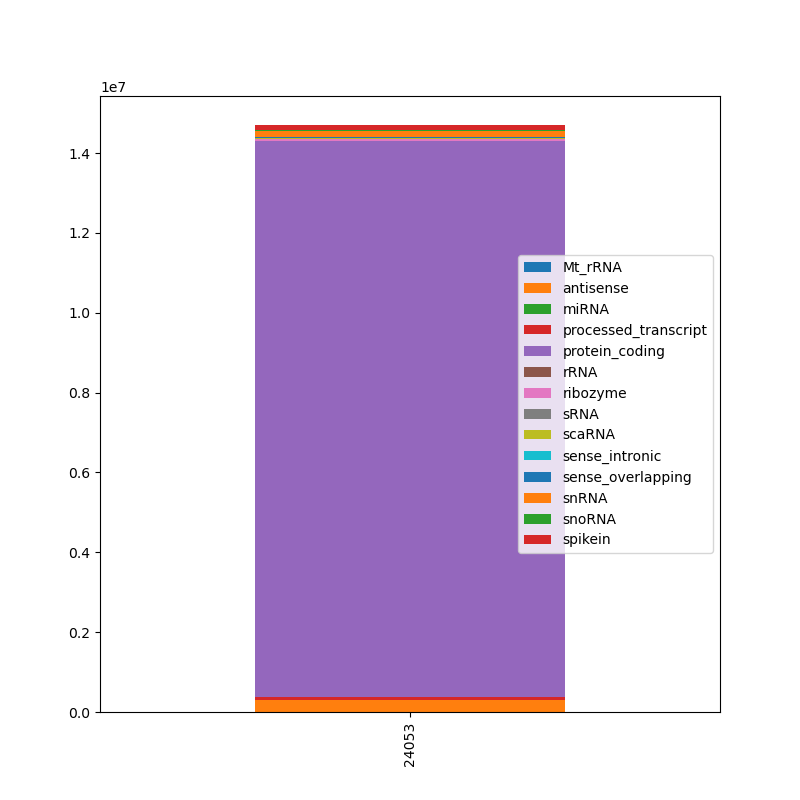
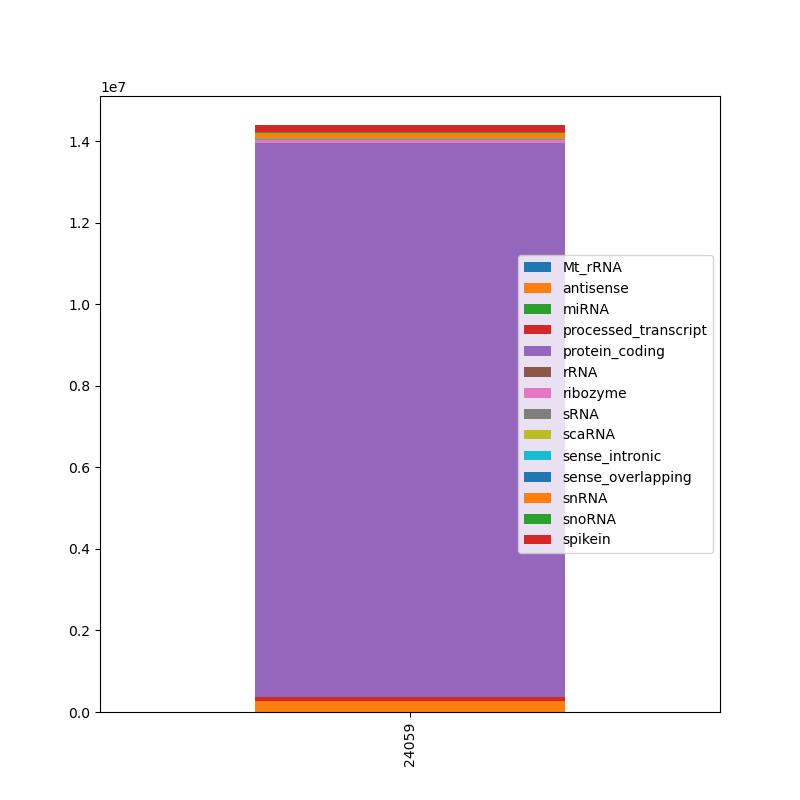
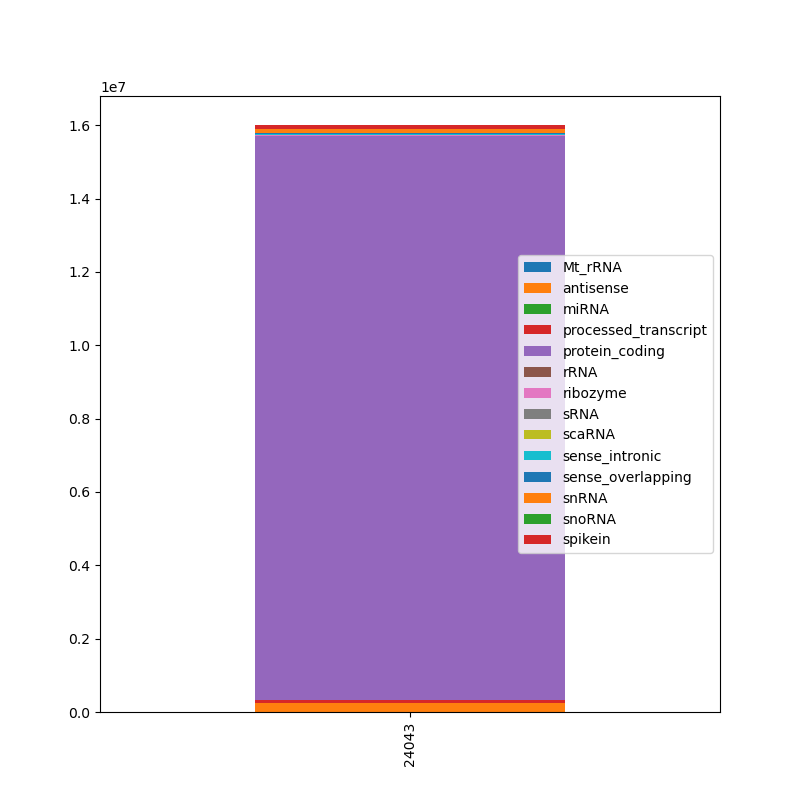
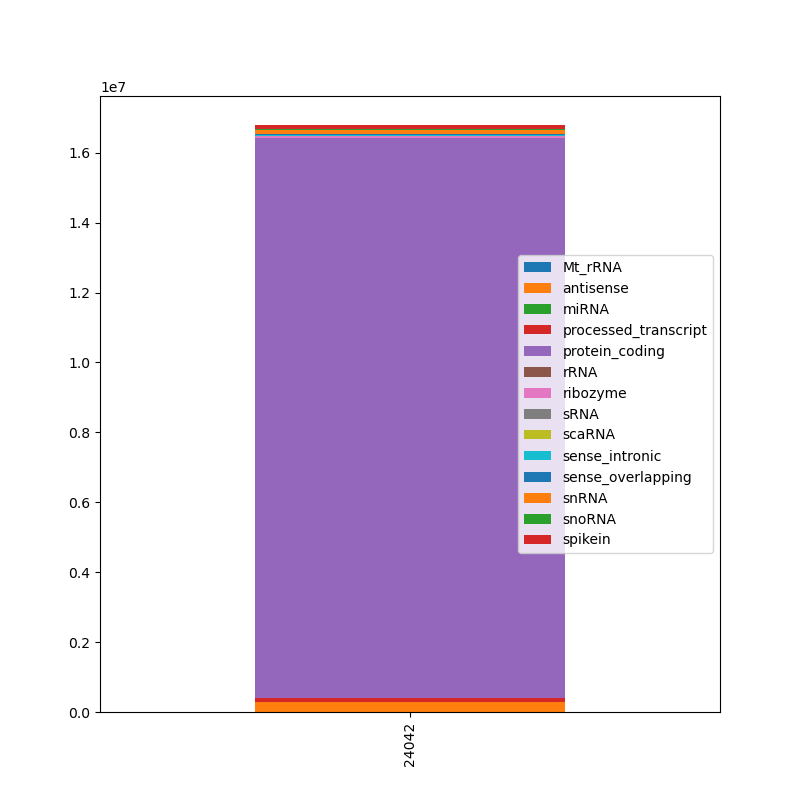
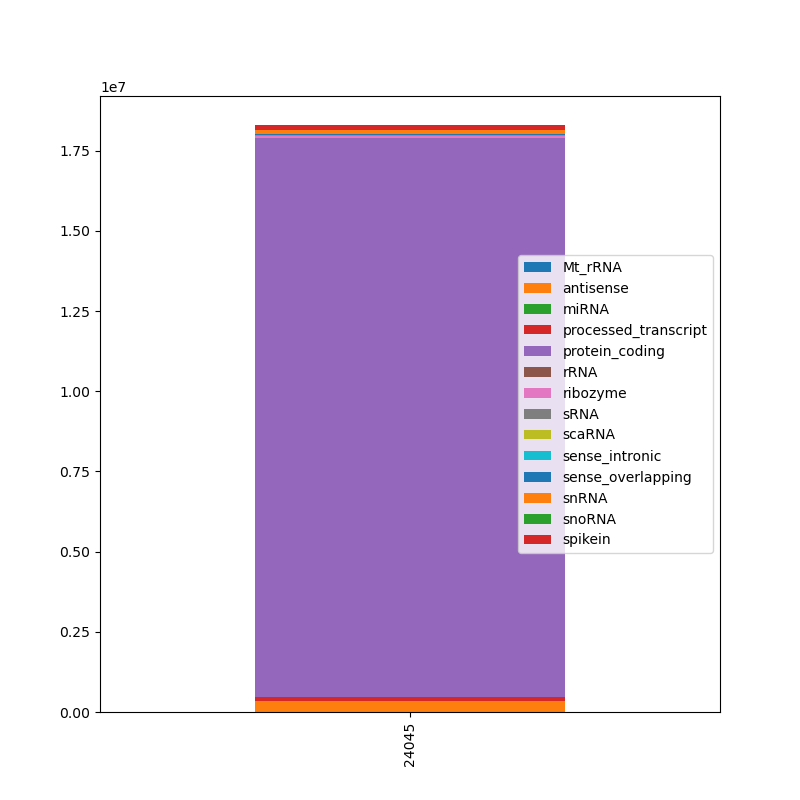
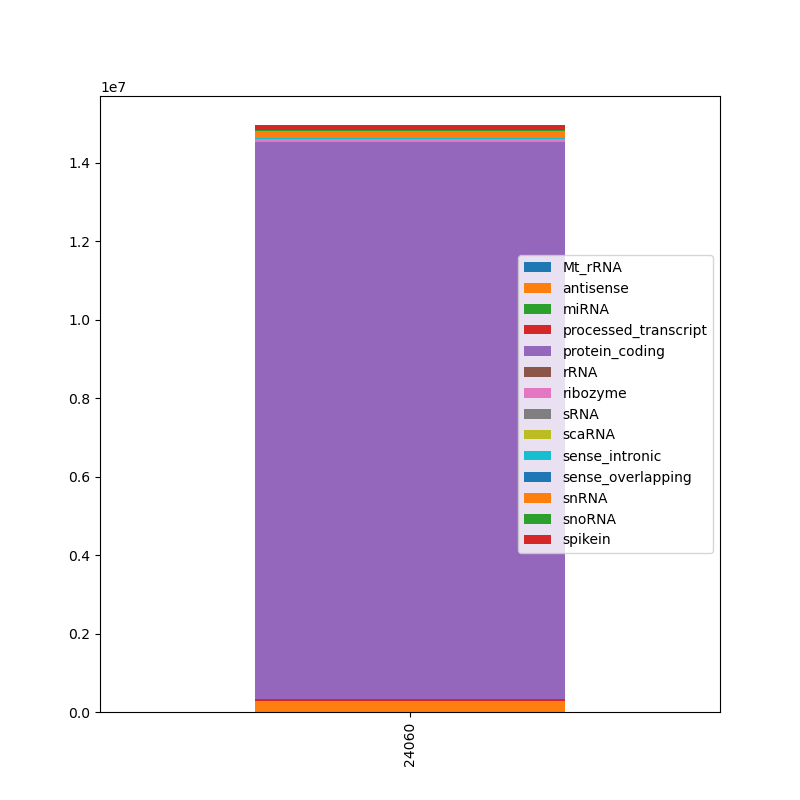
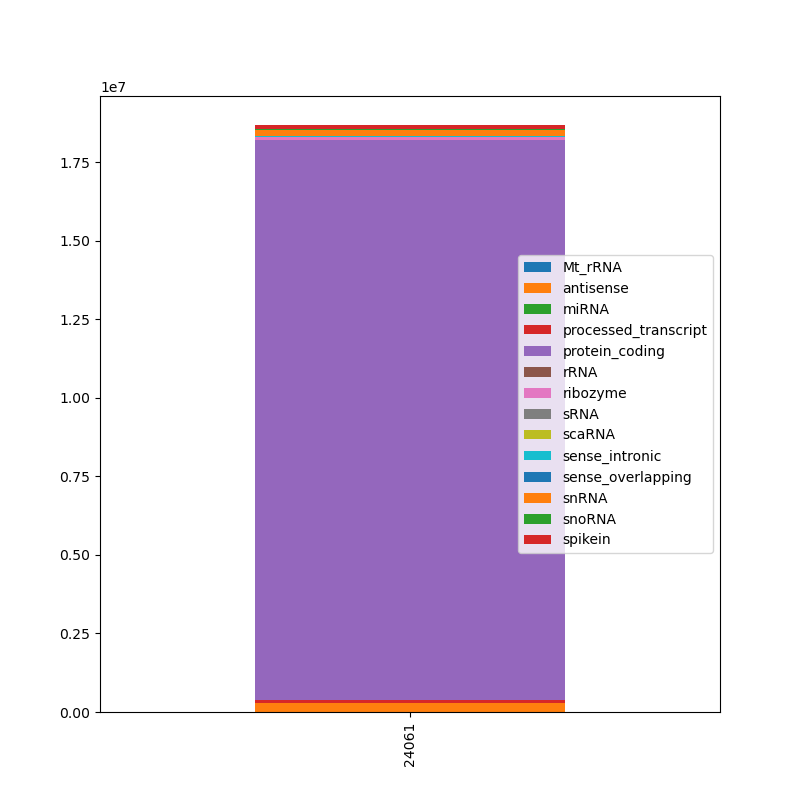
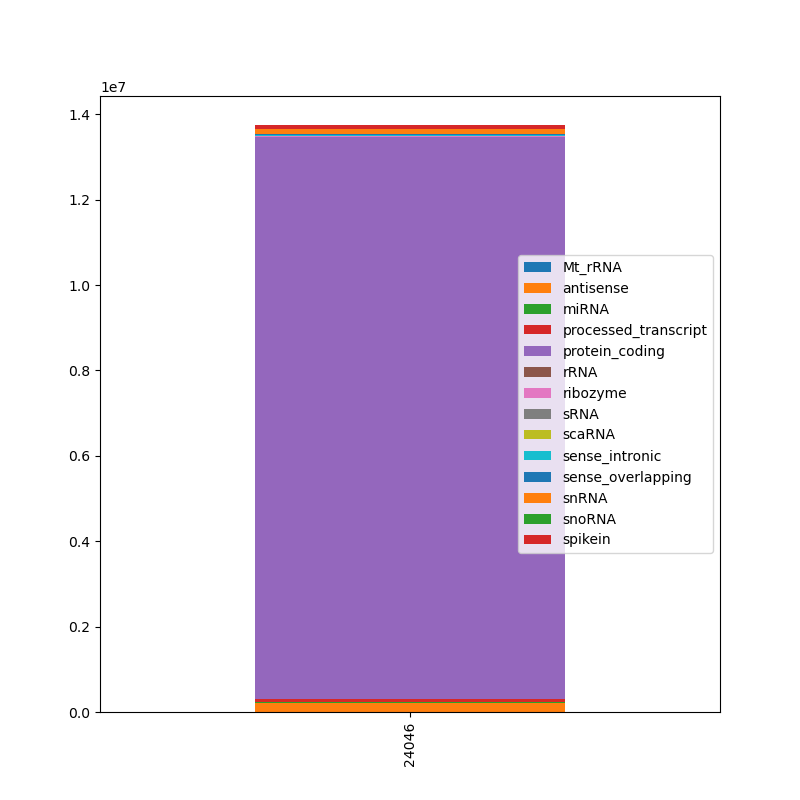
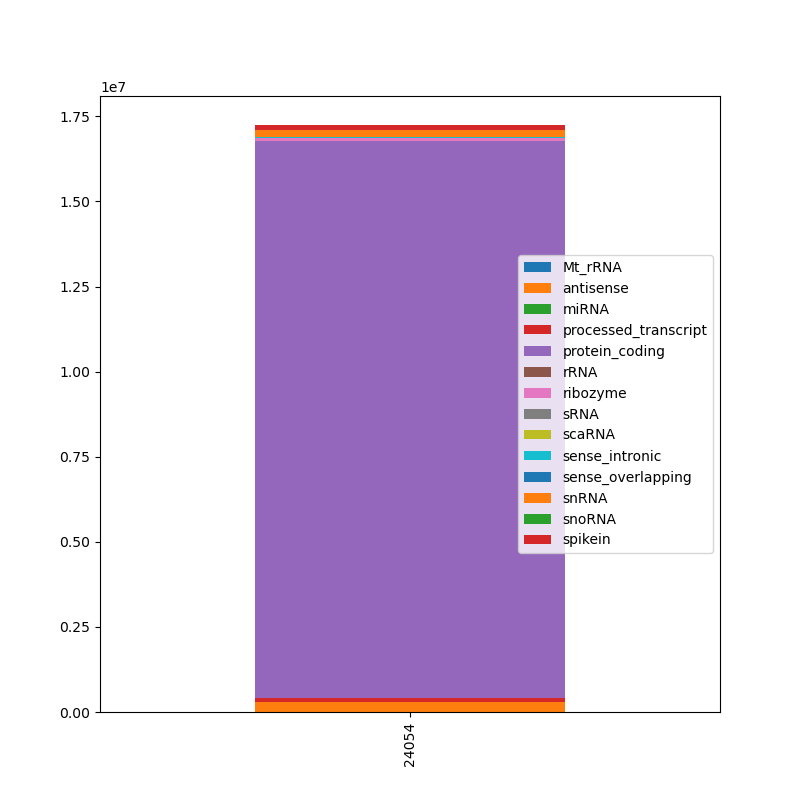
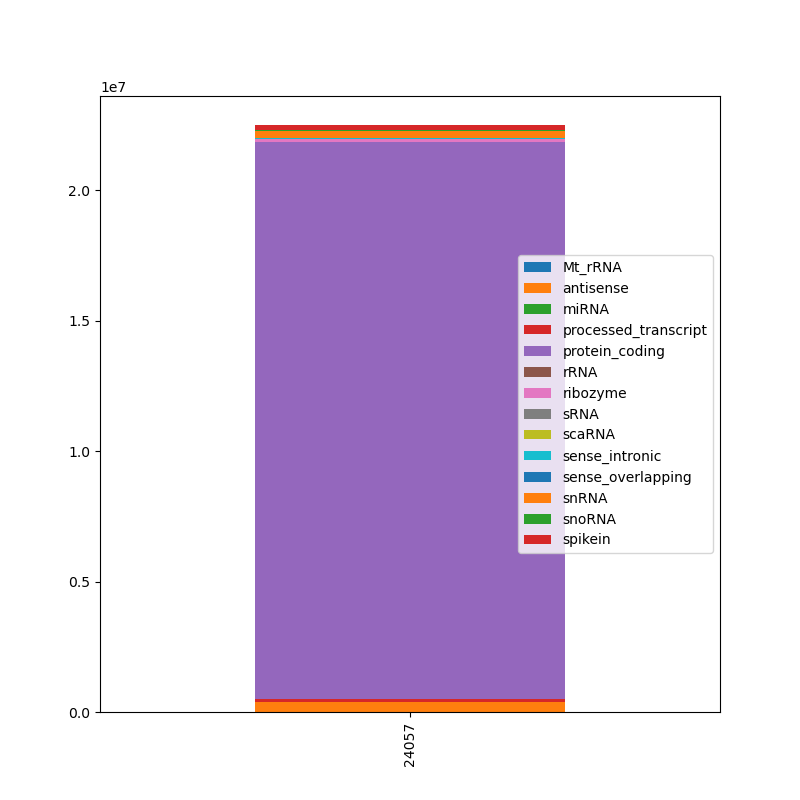
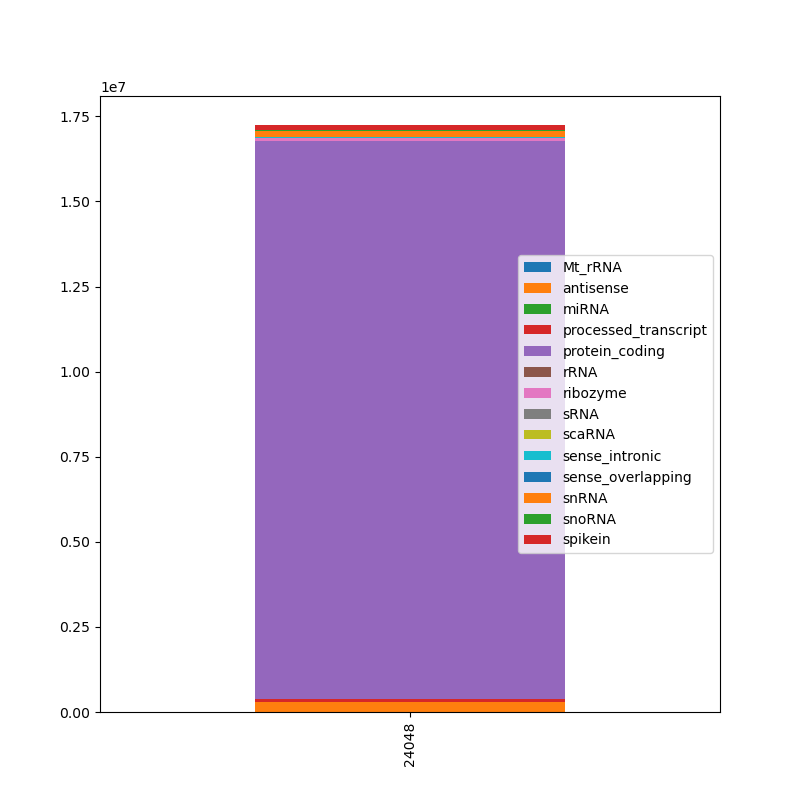
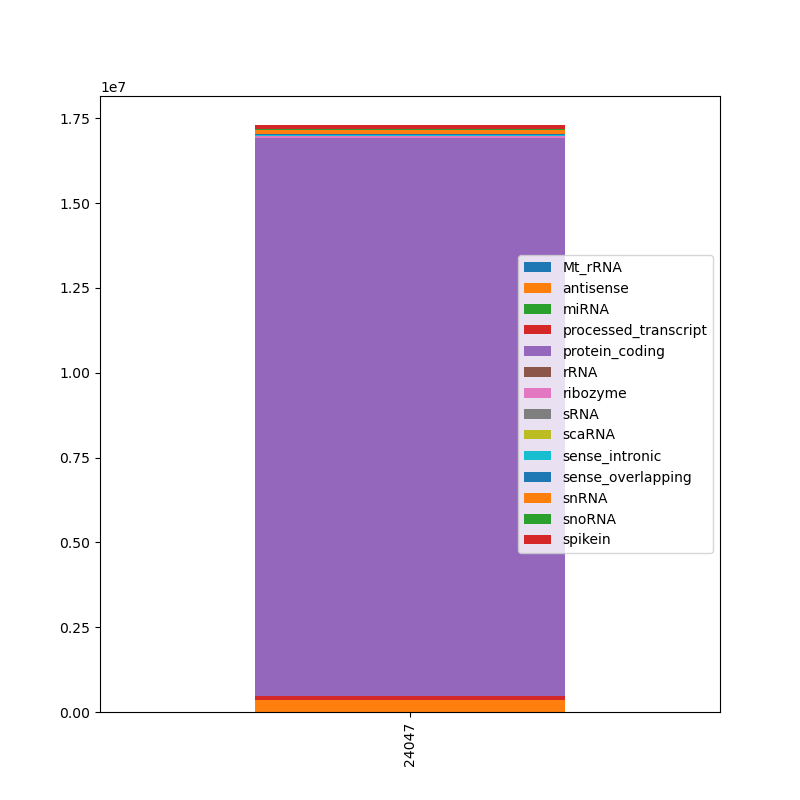
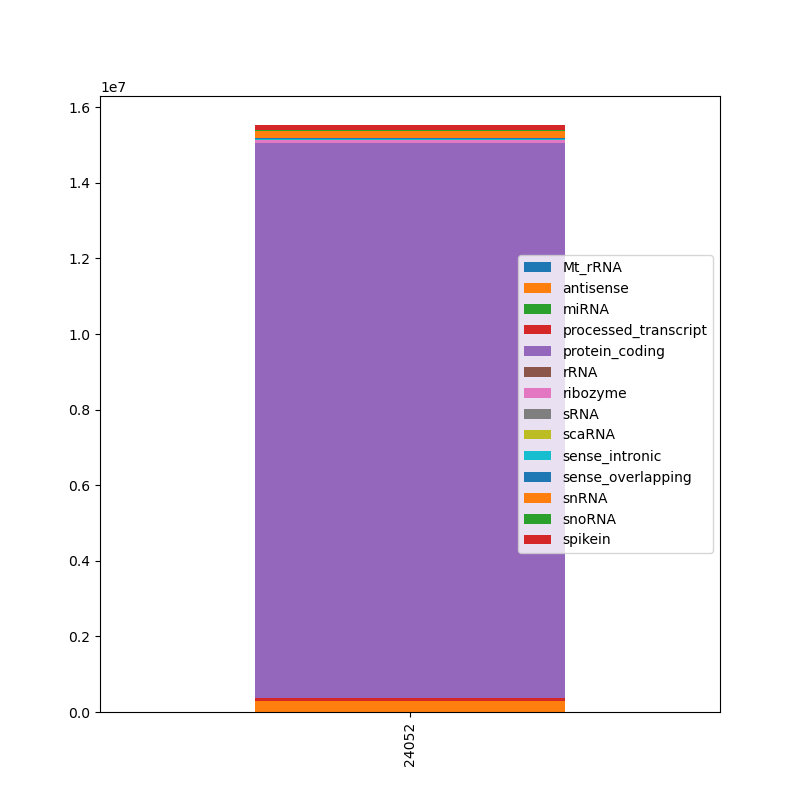
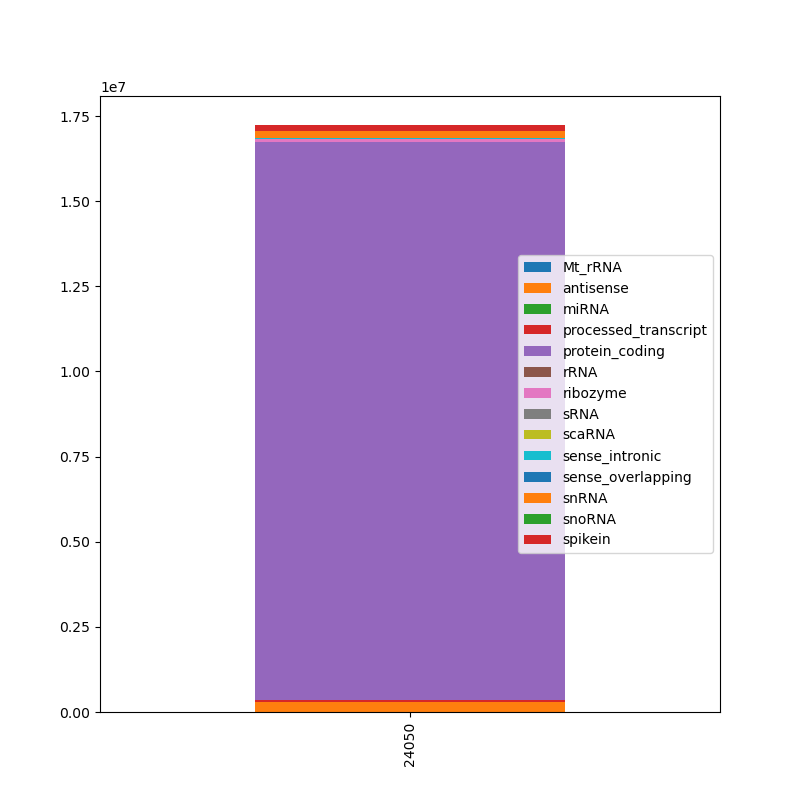
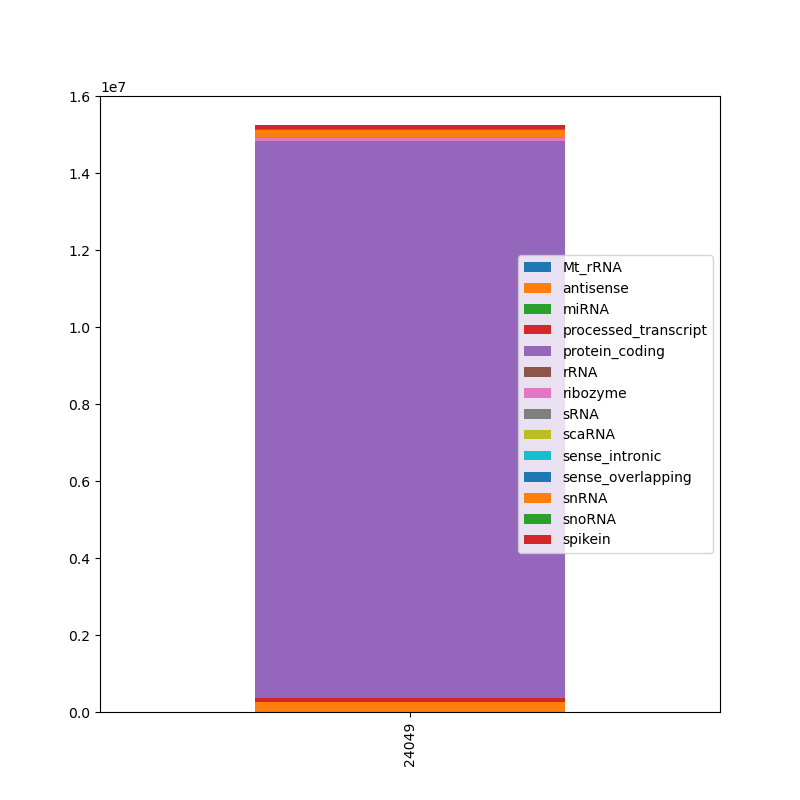
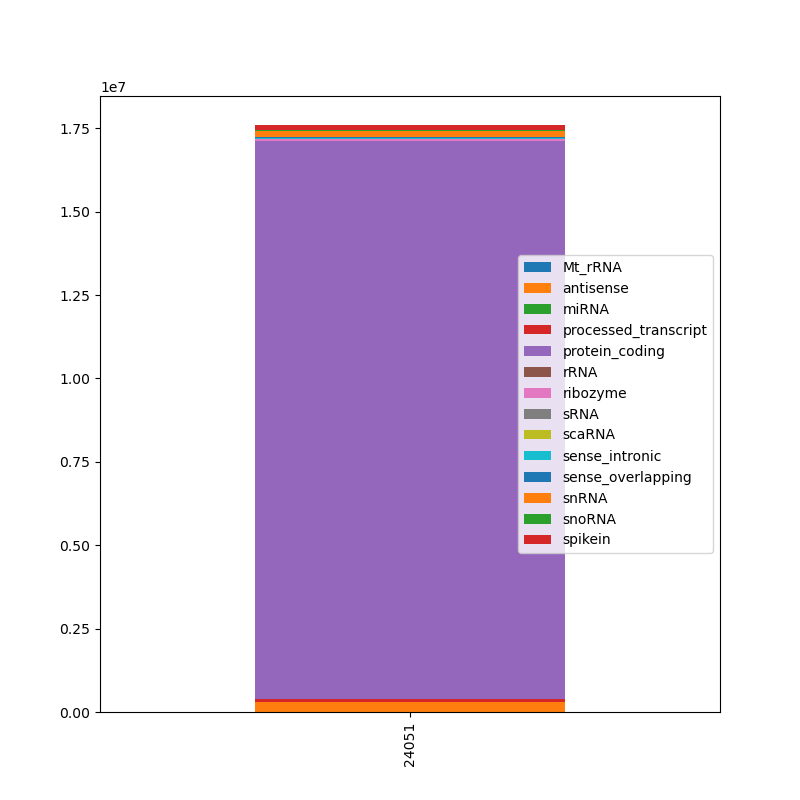
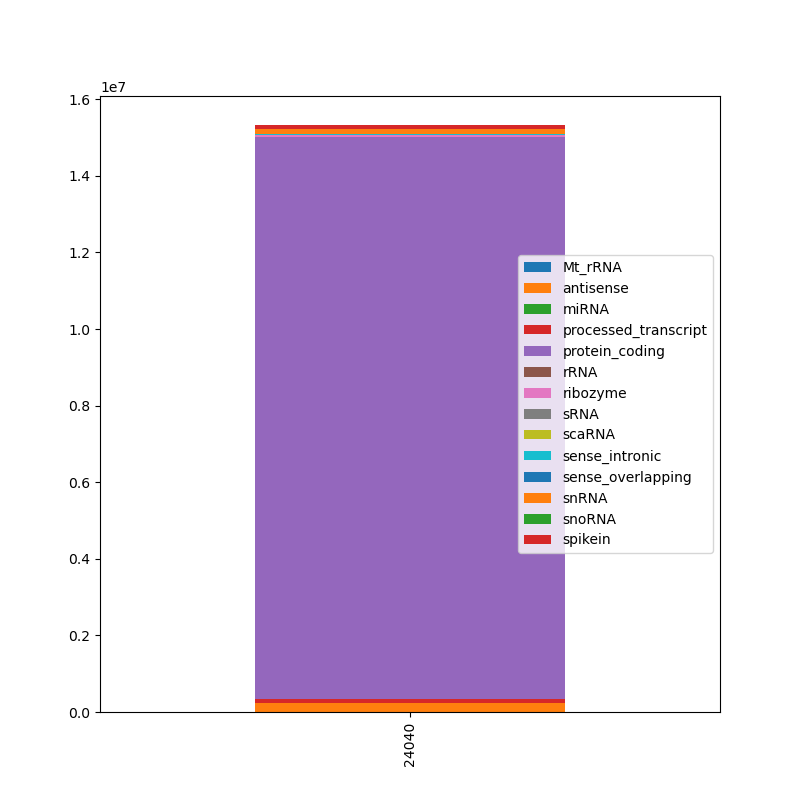
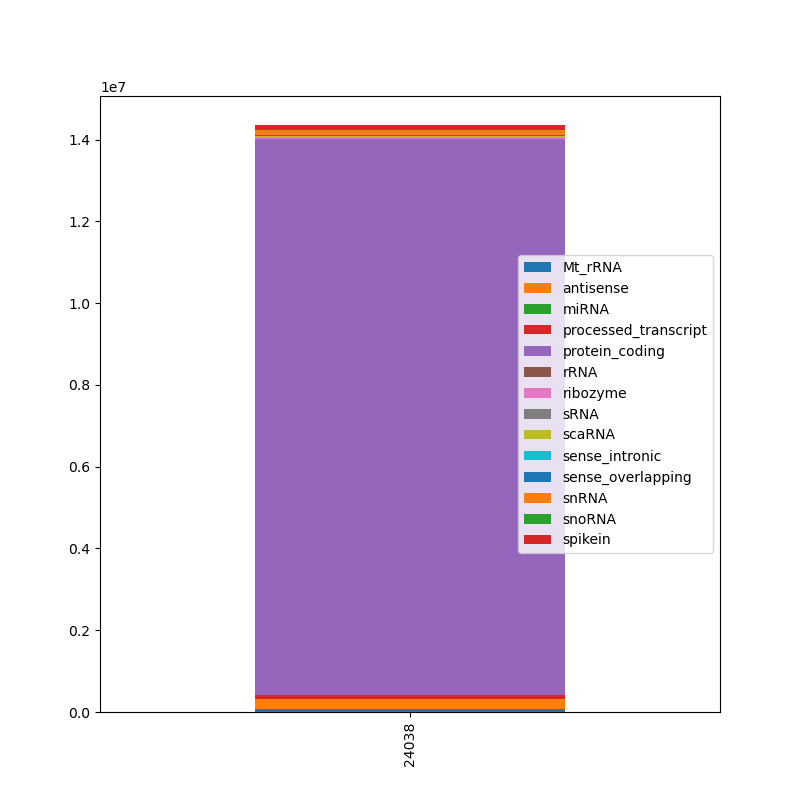
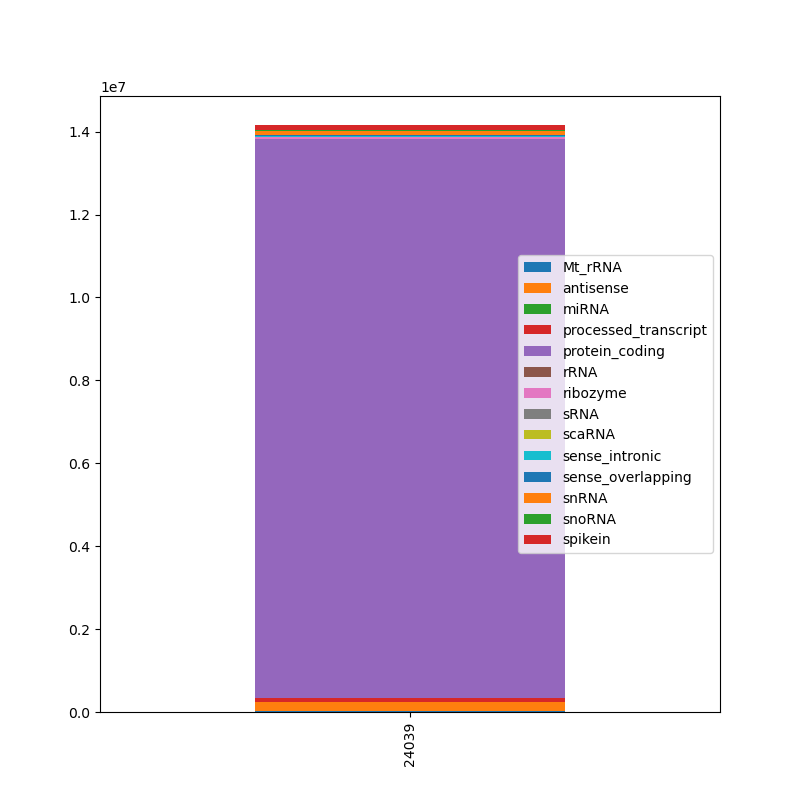
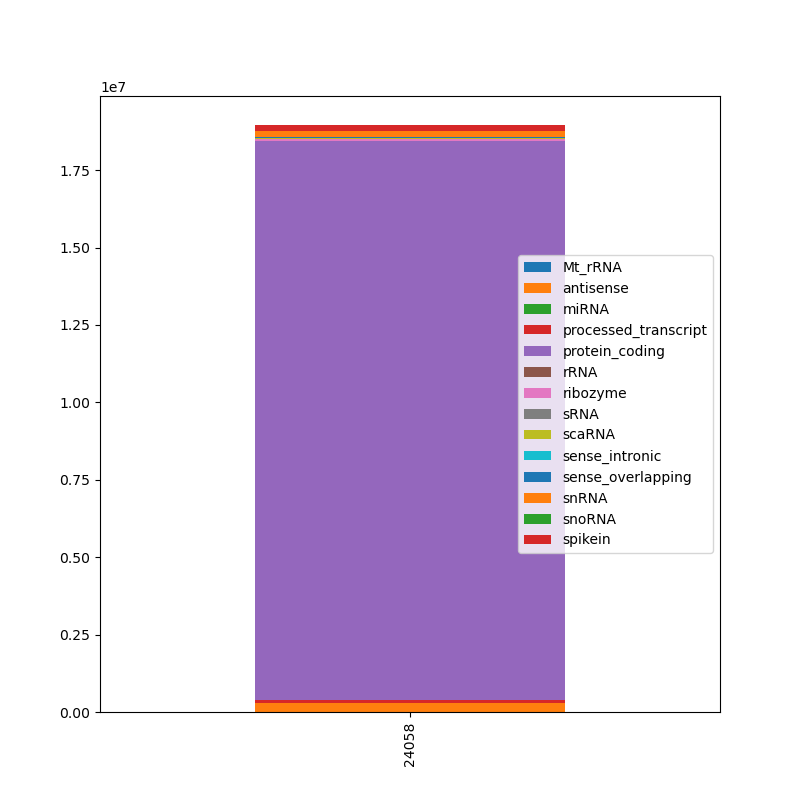
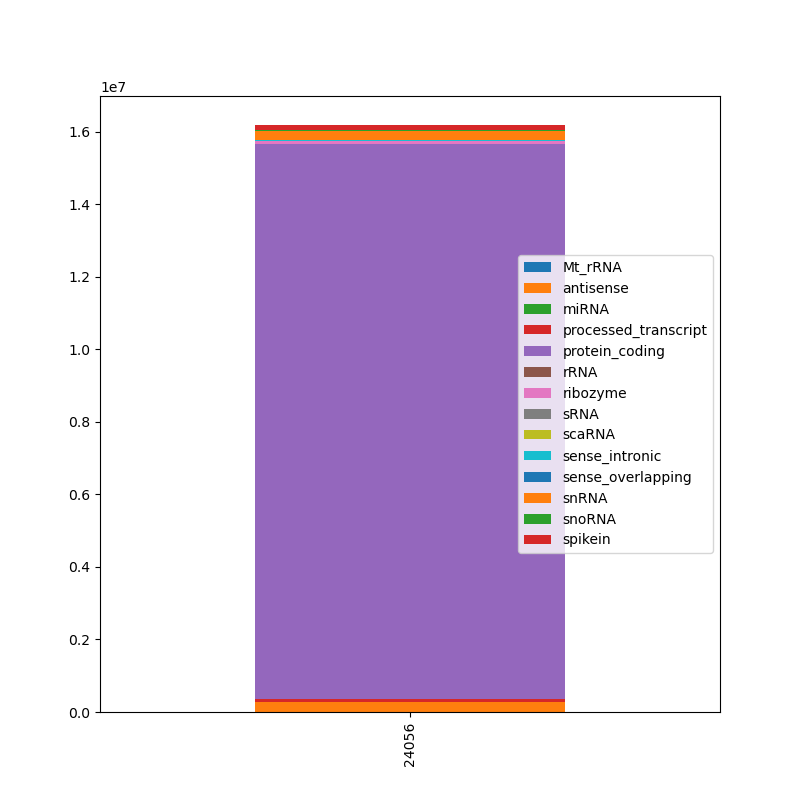
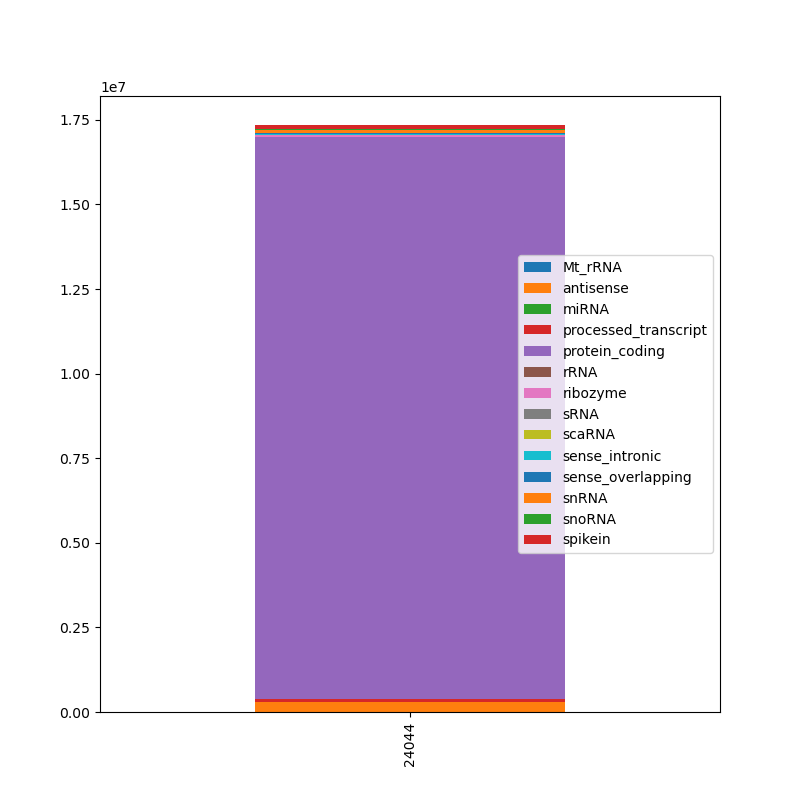

In [9]:
report = []
for row in graph["@graph"]:
    experiment = server.get_experiment(row["@id"])
    report.extend(report_experiment(experiment))
    
HTML("\n".join(report))